## Getting the data in the environment

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/flickr8k/images"

1000268201_693b08cb0e.jpg  2701487024_e866eb4550.jpg  3391209042_d2de8a8978.jpg
1001773457_577c3a7d70.jpg  2701603045_6cbdc4ce7c.jpg  3391924827_53b31542ce.jpg
1002674143_1b742ab4b8.jpg  2701895972_8605c4e038.jpg  3392019836_c7aeebca1c.jpg
1003163366_44323f5815.jpg  2702506716_17a7fb3ba4.jpg  3392293702_ccb0599857.jpg
1007129816_e794419615.jpg  270263570_3160f360d3.jpg   3392851587_a638ff25e2.jpg
1007320043_627395c3d8.jpg  2703155733_19ac6f97a8.jpg  3393035454_2d2370ffd4.jpg
1009434119_febe49276a.jpg  2704257993_d485058a5f.jpg  3393152604_27bd1037f2.jpg
1012212859_01547e3f17.jpg  2704362232_7d84503433.jpg  3393343330_b13df4d8ec.jpg
1015118661_980735411b.jpg  2704379125_9c35650d16.jpg  3393394134_0caac47e1c.jpg
1015584366_dfcec3c85a.jpg  2704934519_457dc38986.jpg  3393446245_37dd3f3b59.jpg
101654506_8eb26cfb60.jpg   2705793985_007cc703fb.jpg  339350939_6643bfb270.jpg
101669240_b2d3e7f17b.jpg   2705947033_5999147842.jpg  3393926562_66cc01b001.jpg
1016887272_03199f49c4.jpg  2706023395_ac9

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [ ]:
images_path = '/content/drive/MyDrive/Colab Notebooks/flickr8k/images/'
images = glob(images_path+'*.jpg')
len(images)

8091

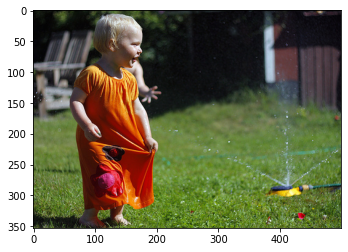

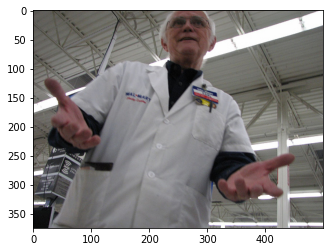

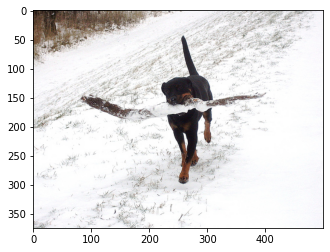

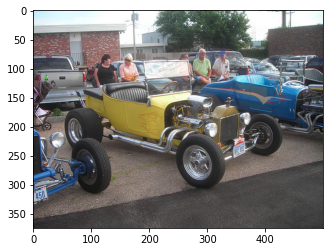

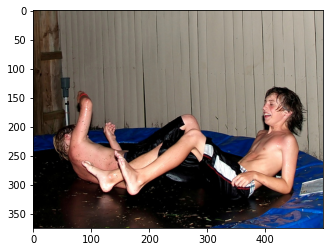

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
!pip install resnet

In [ ]:
from keras.applications.resnet import ResNet50

incept_model = ResNet50(include_top=True)
incept_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1500:
        break
        
    elif count % 100 == 0:
        print(count)
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [ ]:
len(images_features)

2001

In [ ]:
caption_path = "/content/drive/MyDrive/Colab Notebooks/flickr8k/Flickr8k.token.txt"

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
len(captions_dict)

2001

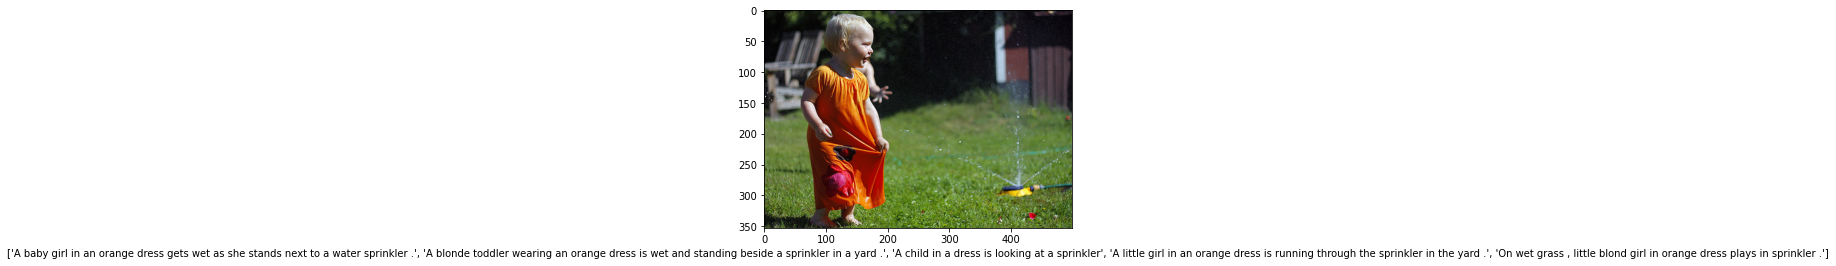

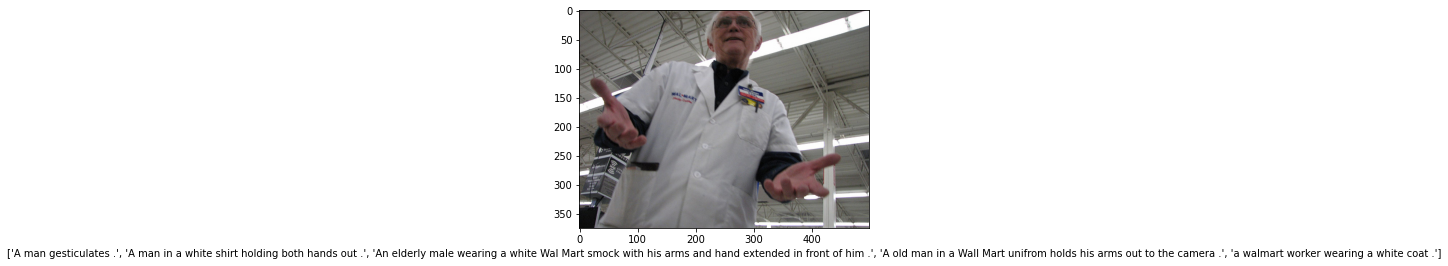

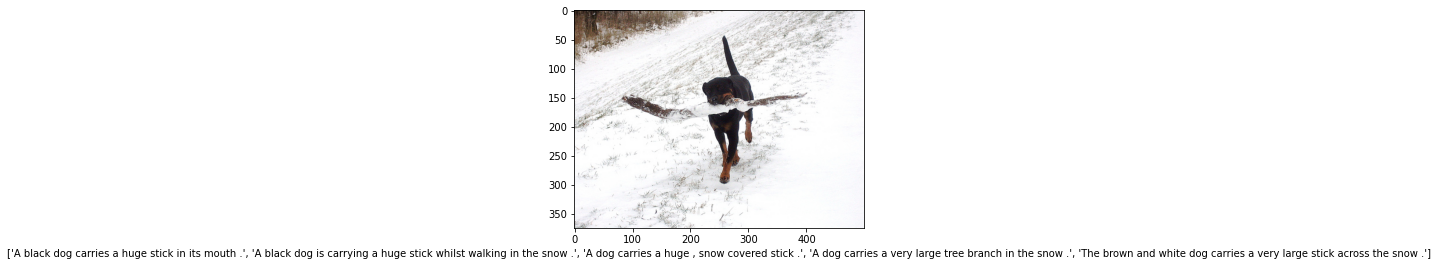

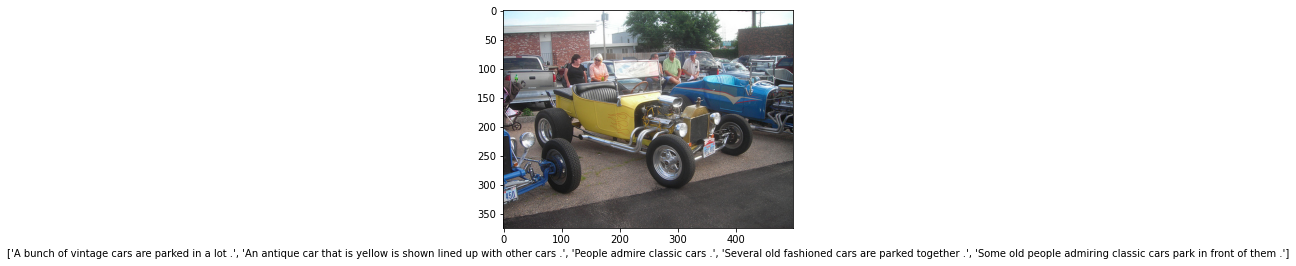

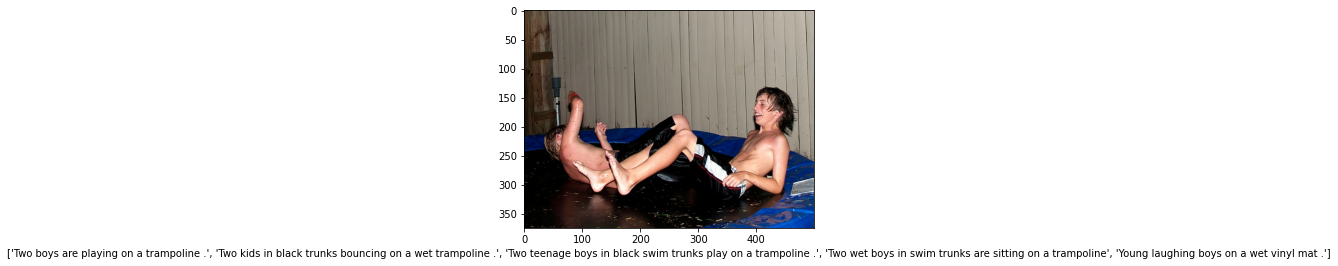

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

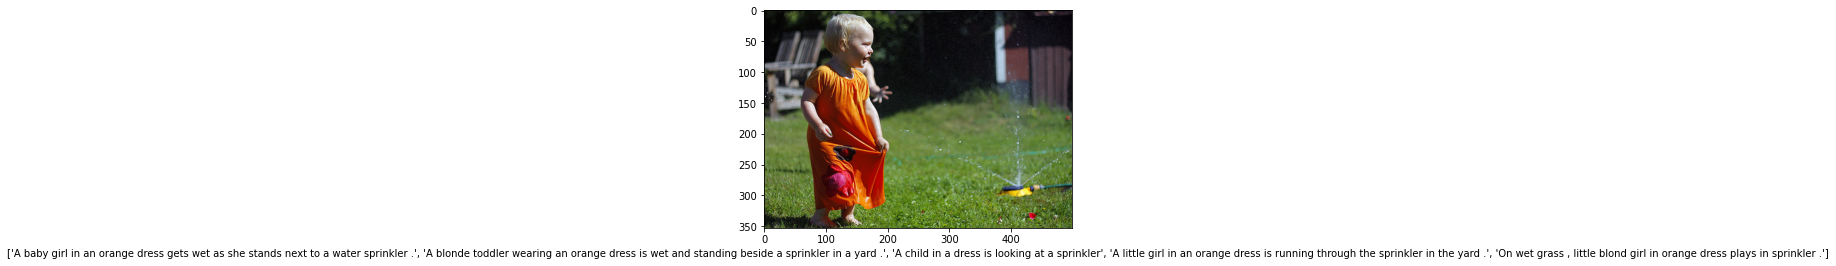

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '/content/drive/MyDrive/Colab Notebooks/flickr8k/images/' + k
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
len(count_words)

4604

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
len(new_dict)

4604

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'3330675488_8692476a4a.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   2,
   12,
   13,
   14,
   2,
   15,
   16,
   17,
   18,
   19,
   20],
  [1, 21, 22, 23, 24, 25, 26, 27, 2, 28, 29, 19, 20],
  [1, 21, 22, 30, 27, 31, 32, 27, 2, 33, 34, 19, 20],
  [1, 21, 35, 24, 27, 36, 20],
  [1, 21, 37, 22, 38, 36, 39, 31, 26, 19, 20]],
 '3526018344_450c517a72.jpg': [[1, 2, 40, 41, 42, 43, 20],
  [1, 44, 42, 45, 4, 2, 46, 19, 20],
  [1, 44, 42, 21, 47, 48, 21, 49, 43, 4, 31, 50, 19, 20],
  [1, 44, 51, 42, 52, 25, 2, 5, 46, 14, 53, 54, 4, 31, 55, 20],
  [1, 21, 49, 42, 48, 21, 47, 42, 52, 25, 31, 50, 19, 20]],
 '3526150930_580908dab6.jpg': [[1,
   2,
   56,
   48,
   2,
   37,
   3,
   57,
   48,
   58,
   59,
   2,
   60,
   19,
   20],
  [1, 2, 56, 48, 2, 37, 3, 61, 59, 31, 62, 13, 4, 63, 41, 64, 54, 19, 20],
  [1, 2, 56, 48, 3, 57, 65, 4, 2, 66, 19, 20],
  [1, 2, 56, 67, 14, 2, 51, 3, 27, 18, 68, 4, 63, 41, 2, 69, 70, 19, 20],
  [1,
   2,
   56,
   14,
   4

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 10, 11, 2, 12, 13, 14, 2, 15, 16, 17, 18, 19, 20]
[1, 2, 56, 14, 47, 71, 72, 73, 14, 2, 15, 3, 14, 74, 47, 71, 75, 76, 10, 64, 77, 54, 19, 20]
[1, 2, 56, 78, 2, 60, 79, 76, 10, 2, 80, 81, 48, 4, 63, 41, 82, 81, 83, 72, 84, 78, 2, 60, 19, 20]
[1, 2, 296, 297, 170, 208, 298, 299, 27, 121, 140, 76, 10, 82, 170, 83, 72, 79, 233, 121, 139, 27, 2, 300, 108, 19, 20]
[1, 2, 81, 14, 372, 27, 121, 168, 72, 376, 211, 31, 56, 14, 2, 49, 375, 48, 77, 377, 76, 10, 267, 378, 79, 4, 63, 41, 2, 77, 379, 373, 19, 20]


In [ ]:
MAX_LEN

34

In [ ]:
captions_dict

{'3330675488_8692476a4a.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   2,
   12,
   13,
   14,
   2,
   15,
   16,
   17,
   18,
   19,
   20],
  [1, 21, 22, 23, 24, 25, 26, 27, 2, 28, 29, 19, 20],
  [1, 21, 22, 30, 27, 31, 32, 27, 2, 33, 34, 19, 20],
  [1, 21, 35, 24, 27, 36, 20],
  [1, 21, 37, 22, 38, 36, 39, 31, 26, 19, 20]],
 '3526018344_450c517a72.jpg': [[1, 2, 40, 41, 42, 43, 20],
  [1, 44, 42, 45, 4, 2, 46, 19, 20],
  [1, 44, 42, 21, 47, 48, 21, 49, 43, 4, 31, 50, 19, 20],
  [1, 44, 51, 42, 52, 25, 2, 5, 46, 14, 53, 54, 4, 31, 55, 20],
  [1, 21, 49, 42, 48, 21, 47, 42, 52, 25, 31, 50, 19, 20]],
 '3526150930_580908dab6.jpg': [[1,
   2,
   56,
   48,
   2,
   37,
   3,
   57,
   48,
   58,
   59,
   2,
   60,
   19,
   20],
  [1, 2, 56, 48, 2, 37, 3, 61, 59, 31, 62, 13, 4, 63, 41, 64, 54, 19, 20],
  [1, 2, 56, 48, 3, 57, 65, 4, 2, 66, 19, 20],
  [1, 2, 56, 67, 14, 2, 51, 3, 27, 18, 68, 4, 63, 41, 2, 69, 70, 19, 20],
  [1,
   2,
   56,
   14,
   4

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)


(128486, 128486, 128486)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

((128486, 2048), (128486, 34), (128486, 4605))

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 34, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 128)           589440    
_________________________________________________________________
lstm (LSTM)                  (None, 34, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 34, 128)           32896     
Total params: 1,016,576
Trai

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model_1.h5')

In [ ]:
model.save_weights('mine_model_1_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [ ]:
for i in range(20):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)